# Optimizing Random Forest with RFECV in Dask

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE, RFECV

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_score,
)

from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import confusion_matrix

import warnings
warnings.simplefilter('ignore')

In [2]:
# Read in data
data = pd.read_csv("reduced_dim_14.csv")
data

,profile_standardized,.NET,.NET Core,API,API Design,APIs,ASP.NET,ASP.NET MVC,AWS,AWS DynamoDB,...,Xamarin,Xamarin Forms,Xcode,Zend Framework,iOS,iOS Operating System,iOS SDK,iPad,jQuery,js
0,fullstack developer,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,javascript developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,android developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,fullstack developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,ios developer,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
769,javascript developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Assign data to X & y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [5]:
# Instantiate and Fit the RandomForestClassifier Object
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Establish Baseline Classifier Performance with Cross Validation

In [6]:
# Make predictions using the testing data
y_pred = model.predict(X_test)
print(
    "Accuracy of random forest classifier on test set: {:.5f}".format(
       np.mean(cross_val_score(model, X_test, y_test, cv=10))
    )
)

Accuracy of random forest classifier on test set: 0.45743


The problem set currently consists of 306 features. It's likely that many of these features do not add useful information, and actually reduce algorithm performance. This is referred to as noise.

To reduce this, and to find the optimal number of features to specify with Recursive Feature Elimination (RFE), cross-validation is used to run RFE in an n-fold split. In this process, the training set will undergo the RFE process two (2) times. Each time, the classifier will be trained on the training set and scored on the test set. The mean result from these two splits is marked on the RFECV graph below.

**Running Cross-Validated Recursive Feature Elimination  (RFECV) is too computationally expensive without first cutting features down from the 306 features we read in with the data.** So features will be cut down from 306 in order to run RFECV below:

In [8]:
# Instantiate & Fit the RFE model
rfe = RFE(model).fit(X, y)
print("RFE ranking: ", rfe.ranking_) # rank of 1 indicates selected features

selection = rfe.get_support(1)  # the most important features
print("The number of features selected is: ", len(selection))

X = X[X.columns[selection]]  # final features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

# Instantiate and Fit the RandomForestClassifier object
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RFE ranking:  [  1  50   1  28  24   1  41   1   1   1 153   1   1   1 135  46   1   1
   1 114   1   1  62  45  91   1   1   1   1   1   1   1   1   1 141  66
   1 124 120 108 126   2 149   1   1 100   1  21   1   1  29 110  57   1
   1 134   1   1   1   1   1   1  26  85  52 101 142   1  51 117 129  67
   1   1   1 121 147   8   7   1   1 132   1  15  82  92  16   1 113   1
   1  96 151  11   1  94   1   1   1   1   1  33 136  43   1 150 148   1
   1   1   1   1   1   1  34 102 127  13   1 137  17   1   1  48   1   1
  83   1 140 131  12   1   1  75  95   1  36  88   1   1   1   1   1 125
   1   1   1   1  56  39  55   1  37  61   1   1  74   9   1   1  84  25
  58  65 133   1   1  42   1   1 143   1   1 138  59   1   1   1   1 116
   1   1  40  60   1  79  68   1  81  97   1   1  86  27 154   6   1  69
   1   1   1   1  23   1  72   1  22  14   1   1  63 144   1   1   1 109
  38 152  20  73   1  54  87   1   1   1   1  47  80   1   1   1   1   1
   5  71 105  49   1   1 103  98 119 

RandomForestClassifier(random_state=0)

# RFECV
The mean number of features returned with RFECV is the optimal number of features by which to train our classifier. This metric is extrememly useful as it allows us to optimize algorithm performance by optimizing the number of features on which to train it. 

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

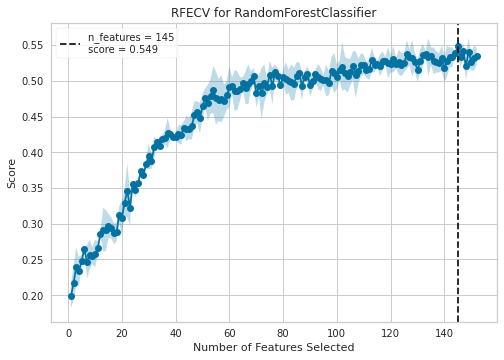

In [9]:
cv = StratifiedKFold(2)
visualizer = RFECV(model, cv=cv, scoring="accuracy")

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show("optimized_RFE.png")

# Comparing Classifier Performance with RFECV
The RFECV Chart reveals the optimal number of 145 features to produce an accuracy score of about 55%, which is roughly a 10% improvement to the Benchmark Model's accuracy score of 45.7%.

In [9]:
# Specifying optimal num_features = 145
rfe = RFE(model, 145) 
rfe = rfe.fit(X, y)
print(rfe.support_) # True indicates features selected
f = rfe.get_support(1)
X = X[X.columns[f]]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [10]:
# X has been set to optimized num_features = 145
len(X.columns)

145

In [11]:
# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

# Instantiate and Fit the RandomForestClassifier object
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Finally, the Confusion Matrix provides a more in-depth look at how classes are being classified, with the correctly classified classes falling on the diagonal of the matrix.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


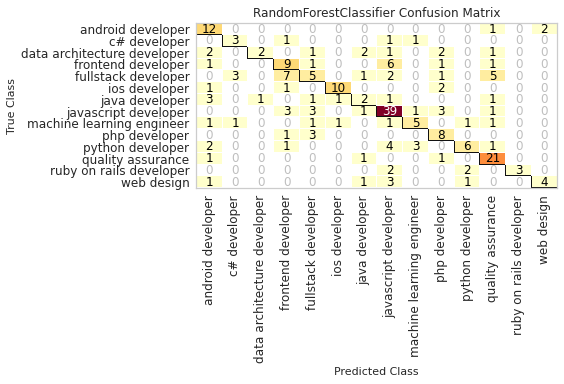

<Figure size 576x396 with 0 Axes>

In [12]:
# Instantiate the Yellowbrick Library visualizer with the classification model
confusion_matrix(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=[
        "android developer",
        "c# developer",
        "data architecture developer",
        "frontend developer",
        "fullstack developer",
        "ios developer",
        "java developer",
        "javascript developer",
        "machine learning engineer",
        "php developer",
        "python developer",
        "quality assurance",
        "ruby on rails developer",
        "web design",
    ],
)
plt.tight_layout()

# Interpreting the Matrix:
We can see that Java Developers were only classified correctly 20% of the time, with two instances classified as data architecture developers, and the other four as fullstack, javascript, quality assurance and web design developers. On the other hand, ios developers were classified correctly about 83% of the time, as we can see that 10 fall on the diagonal with only two (2) instances misclassified as a java and machine learning engineer.